# CHB 01

Explorando dataset, plotagens e extração de atributos.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from pywt import dwt, idwt
from zipfile import ZipFile
from matplotlib import pyplot as plt
from statsmodels.robust.scale import mad as medianAD

## Carregando dados

In [2]:
with ZipFile('chb01.zip', 'r').open('chb01/positive/positive_chb01_03.edf_0.npy') as data:
    positiveDF = pd.DataFrame(data=np.load(data), dtype=np.float64).transpose()
positiveDF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1.401506,1.390505,1.388322,0.093576,-0.464336,0.893744,2.460113,1.351838,0.221089,0.634625,1.225464,-0.039194,1.505574,1.139483,0.698705,-1.153387,0.771822,2.251347
1,1.305539,1.544920,1.407882,0.070050,-0.422870,0.959920,2.585412,1.177088,0.552711,0.541600,0.986837,-0.047047,1.846407,0.982271,0.454579,-1.035679,0.644418,2.266822
2,1.123203,1.794359,1.368763,-0.035817,-0.497509,1.059184,2.585412,1.011536,0.841818,0.389378,0.802443,-0.502494,1.818004,1.159135,0.227288,-1.412344,0.460390,2.243609
3,1.036833,1.948774,1.300304,-0.129921,-0.472629,1.150176,2.414550,0.937957,0.986371,0.347094,0.628896,-0.722365,1.846407,1.277044,0.075761,-1.647760,0.361299,2.251347
4,1.132800,1.758725,1.163388,-0.082869,-0.348231,1.125360,2.334814,0.726418,1.105415,0.380921,0.509582,-0.738070,2.262980,1.021574,-0.126275,-1.545746,0.389610,2.282297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,2.495524,1.152944,0.478804,1.011091,1.567492,1.125360,0.819833,0.882773,0.884334,1.615615,1.138691,0.204234,2.187240,2.495435,-0.168365,-0.266654,1.083254,1.052014
508,2.601087,0.951017,0.674399,0.834646,1.484560,1.166720,1.002086,0.763207,0.867327,1.632528,1.366471,-0.047047,2.376591,2.475784,-0.269383,-0.400056,1.210658,1.106177
509,2.812214,0.713456,0.625500,0.893461,1.542613,1.224625,0.967913,0.671234,1.156434,1.412651,1.507478,-0.031342,2.821568,2.063102,-0.412492,-0.133252,1.246047,1.144865
510,2.783424,0.547163,0.615721,0.869935,1.476267,1.224625,0.979304,0.560865,1.266975,1.201231,1.485785,-0.400411,2.774230,1.768330,-0.597692,-0.148946,1.260203,1.075227


## Plotando coluna 0 e aplicando dwt

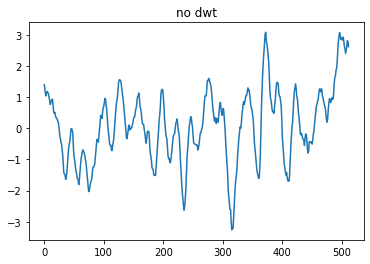

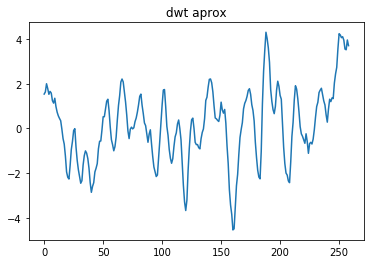

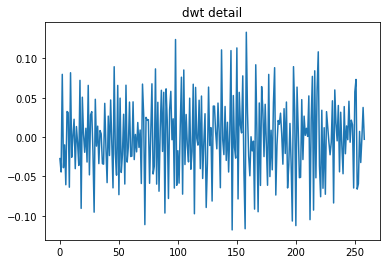

count    512.000000
mean       0.086390
std        1.189361
min       -3.262467
25%       -0.661774
50%        0.120353
75%        0.883287
max        3.080920
Name: 0, dtype: float64

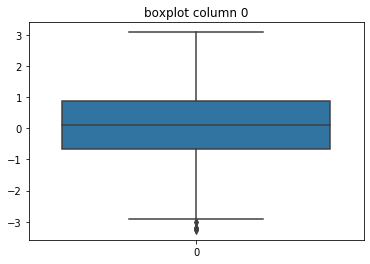

In [3]:
aprox, detail = dwt(data=positiveDF[0], wavelet='db4')

sns.lineplot(data=positiveDF[0]).set_title('no dwt')
plt.show()

sns.lineplot(data=aprox).set_title('dwt aprox')
plt.show()

sns.lineplot(data=detail).set_title('dwt detail')
plt.show()

sns.boxplot(data=positiveDF[0]).set_title('boxplot column 0')
positiveDF[0].describe()

## Extraindo atributos

In [4]:
extractDF = pd.DataFrame()

extractDF['std'] = positiveDF.std()
extractDF['mean'] = positiveDF.mean()
extractDF['skew'] = positiveDF.skew()
extractDF['kurt'] = positiveDF.kurt()
extractDF['meanAD'] = positiveDF.mad()
extractDF['medianAD'] = medianAD(positiveDF)

extractDF.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
std,1.189361,0.820270,0.677817,0.532223,1.038041,0.733654,0.748326,0.716367,1.111746,1.151620,1.119602,0.680646,1.199949,0.887087,1.076144,0.727998,1.024001,0.832331
mean,0.086390,0.161915,0.155212,0.010500,-0.088778,0.126207,0.197653,0.150990,-0.033623,-0.019902,0.272120,-0.371577,0.040984,0.342639,-0.032787,-0.508032,0.086971,0.080246
skew,0.034281,0.102235,-0.027433,0.335863,0.019939,-0.075021,0.606367,0.195957,0.075790,-0.816394,0.541523,0.142673,-0.086634,0.165979,-0.289327,0.608668,-0.788161,0.407499
kurt,0.142918,-0.281990,-0.605672,-0.281116,0.461764,0.121005,0.013443,-0.671360,-0.243721,0.611535,0.367233,0.045649,1.056727,-0.067001,0.044263,0.068400,1.434643,0.225799
meanAD,0.938420,0.677001,0.564292,0.423819,0.793919,0.571631,0.593551,0.594387,0.883508,0.896315,0.890567,0.528547,0.910358,0.699024,0.841383,0.574598,0.758202,0.650122
medianAD,1.145355,0.854106,0.681477,0.505756,0.916013,0.649998,0.726187,0.784071,1.109396,1.128427,1.053327,0.564646,1.045731,0.874060,0.998463,0.674787,0.781792,0.803028


## Reconstruindo coluna 0 e plotando comparação

array([[1.40150571, 1.40150571],
       [1.30553925, 1.30553925],
       [1.1232028 , 1.1232028 ],
       ...,
       [2.81221366, 2.81221366],
       [2.78342366, 2.78342366],
       [2.6202805 , 2.6202805 ]])

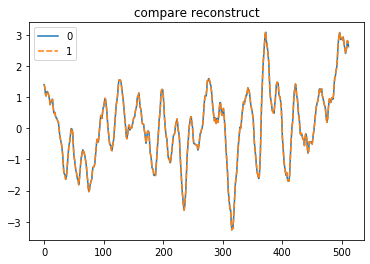

In [5]:
reconstruct = idwt(cA=aprox, cD=detail, wavelet='db4')

sns.lineplot(data=[reconstruct, positiveDF[0].values]).set_title('compare reconstruct')

np.array([reconstruct, positiveDF[0].values]).transpose()